# Работа 1.5. Изучение колебаний струны

**Цель работы**: В работе исследуются условия образования стоячих волн в закреплённой с двух концов натянутой струне. Снимается зависимость частоты колебаний стоячих волн различных конфигураций от величины натяжения струны. Определяется скорость распространение поперечной волны в натянутой струне.

**В работе используются**: рейка со струной, звуковой генератор, постоянный магнит, разновесы.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Известные величины**

$D_{струны} = 0.3 мм$, $\rho_{100 см} = 568.4 мг$, $М_{подвес}=60,6 г$, $l = 50 см$, $F_2 = 9.856 Н$, $F_3 = 14.744 Н$, $F_4 = 19.529 Н$

**Теоретические формулы**

$\lambda_n = \frac{2l}{n}$,  $f_n = \frac{u}{\lambda_n} = \frac{un}{2l}$, $u=\sqrt{\frac{T}{\rho_l}}$

**Построение графиков**

In [18]:
F_2 = 9.856
print('F_2 = {} Н'.format(F_2))
data2 = pd.read_excel('lab-1-5.xlsx', 'table-1')
data2.head(len(data2))

F_2 = 9.856 Н


,n,"fₙ, Гц","Δfₙ, Гц"
0,1,133.0,5
1,2,266.3,10
2,3,397.6,10
3,4,533.6,15
4,5,665.2,20


In [19]:
F_3 = 14.744
print('F_3 = {} Н'.format(F_3))
data3 = pd.read_excel('lab-1-5.xlsx', 'table-2')
data3.head(len(data3))

F_3 = 14.744 Н


,n,"fₙ, Гц","Δfₙ, Гц"
0,1,159,5
1,3,479,15
2,5,802,20


In [20]:
F_4 = 19.529
print('F_4 = {} Н'.format(F_4))
data4 = pd.read_excel('lab-1-5.xlsx', 'table-3')
data4.head(len(data4))

F_4 = 19.529 Н


,n,"fₙ, Гц","Δfₙ, Гц"
0,1,186,10
1,3,576,10
2,5,944,20


In [21]:
grid = np.linspace(0, 5, 50)
x2 = np.array([1, 2, 3, 4, 5])
y2 = data2.values[:, 1]
x3 = np.array([1, 3, 5])
y3 = data3.values[:, 1]
x4 = np.array([1, 3, 5])
y4 = data4.values[:, 1]
dy2 = data2.values[:, 2]
dy3 = data3.values[:, 2]
dy4 = data4.values[:, 2]

In [22]:
k2, b2 = np.polyfit(x2, y2, deg=1)
k3, b3 = np.polyfit(x3, y3, deg=1)
k4, b4 = np.polyfit(x4, y4, deg=1)

In [23]:
print(k2, b2)
print(k3, b3)
print(k4, b4)

133.17 -0.37000000000003036
160.75000000000009 -2.2499999999997873
189.5000000000001 0.16666666666677246


In [24]:
c = np.array([-1, 0, 1])
k2max, b2max = np.polyfit(x2, y2 + dy2 * [-1, -0.5, 0, 0.5, 1], deg=1)
k2min, b2min = np.polyfit(x2, y2 - dy2 * [-1, -0.5, 0, 0.5, 1], deg=1)
k3max, b3max = np.polyfit(x3, y3 + c * dy3, deg=1)
k3min, b3min = np.polyfit(x3, y3 - c * dy3, deg=1)
k4max, b4max = np.polyfit(x4, y4 + c * dy4, deg=1)
k4min, b4min = np.polyfit(x4, y4 - c * dy4, deg=1)

In [25]:
print(k2min, k3min, k4min)
print(k2max, k3max, k4max)
print(b2min, b3min, b4min)
print(b2max, b3max, b4max)

126.92 154.50000000000006 182.00000000000009
139.42 167.00000000000006 197.00000000000006
14.879999999999995 11.500000000000112 19.333333333333464
-15.620000000000005 -15.999999999999721 -18.999999999999854


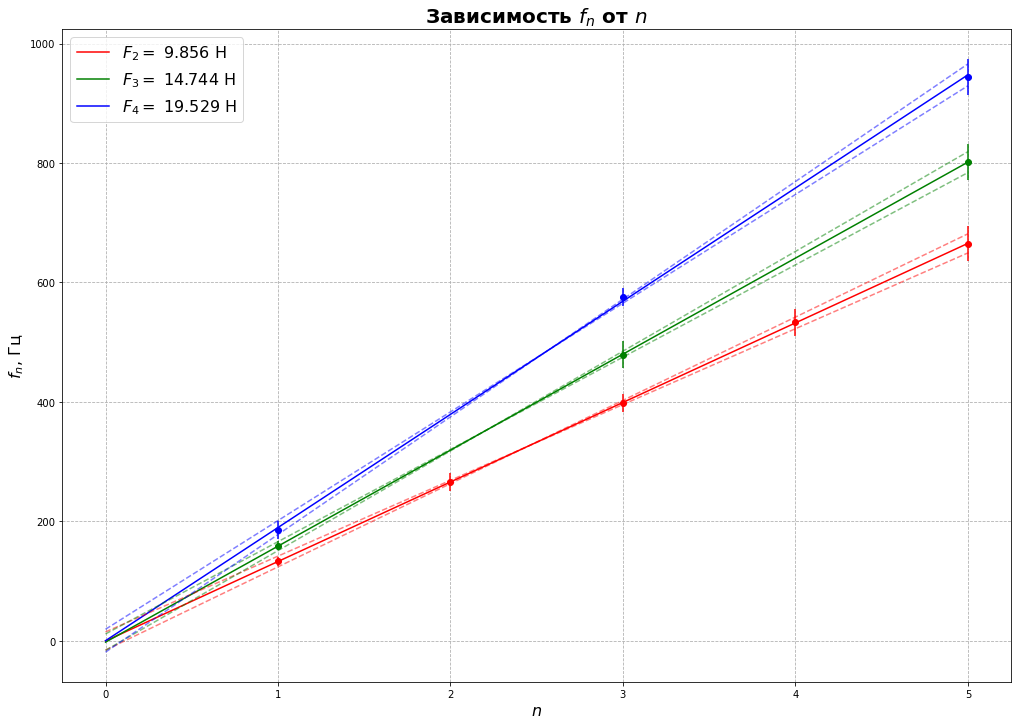

In [26]:
plt.figure(figsize=(17, 12))
plt.grid(linestyle='--')

plt.title('Зависимость $f_n$ от $n$', fontweight='bold', fontsize=20)
plt.xlabel('$n$', fontsize=16)
plt.ylabel('$f_n$, Гц', fontsize=16)

plt.plot(grid, k2 * grid + b2, label='$F_2 =$ {} Н'.format(F_2), color='r')
plt.plot(grid, k3 * grid + b3, label='$F_3 =$ {} Н'.format(F_3), color='g')
plt.plot(grid, k4 * grid + b4, label='$F_4 =$ {} Н'.format(F_4), color='b')

plt.errorbar(x2, y2, yerr=dy2*1.5, fmt='o', color='r')
plt.errorbar(x3, y3, yerr=dy3*1.5, fmt='o', color='g')
plt.errorbar(x4, y4, yerr=dy4*1.5, fmt='o', color='b')

plt.plot(grid, k2min * grid + b2min, '--', alpha=0.5, color='r')
plt.plot(grid, k2max * grid + b2max, '--', alpha=0.5, color='r')
plt.plot(grid, k3min * grid + b3min, '--', alpha=0.5, color='g')
plt.plot(grid, k3max * grid + b3max, '--', alpha=0.5, color='g')
plt.plot(grid, k4min * grid + b4min, '--', alpha=0.5, color='b')
plt.plot(grid, k4max * grid + b4max, '--', alpha=0.5, color='b')

plt.legend(fontsize=16)

plt.show()

In [27]:
l = 0.5
F = np.array([F_2, F_3, F_4])
u = np.array([k2, k3, k4]) * 2 * l
du = (np.array([k2max, k3max, k4max]) - np.array([k2min, k3min, k4min])) / 2
print('Натяжения =', F)
print('Скорости  =', u)
print(du)

Натяжения = [ 9.856 14.744 19.529]
Скорости  = [133.17 160.75 189.5 ]
[6.25 6.25 7.5 ]


In [28]:
k, b = np.polyfit(F, u * u, deg=1)

In [29]:
dF = np.array([0.005, 0.005, 0.005])
du2 = (u * u) * (2 * du / u)
print(du2)

[1664.625 2009.375 2842.5  ]


In [30]:
kmax, bmax = np.polyfit(F - c * dF, u * u + c * du2/2, deg=1)
kmin, bmin = np.polyfit(F + c * dF, u * u - c * du2/2, deg=1)
print(kmax, kmin, bmax, bmin)

2113.1865568582166 1643.8051100387265 -4392.936889198724 2118.8827330337067


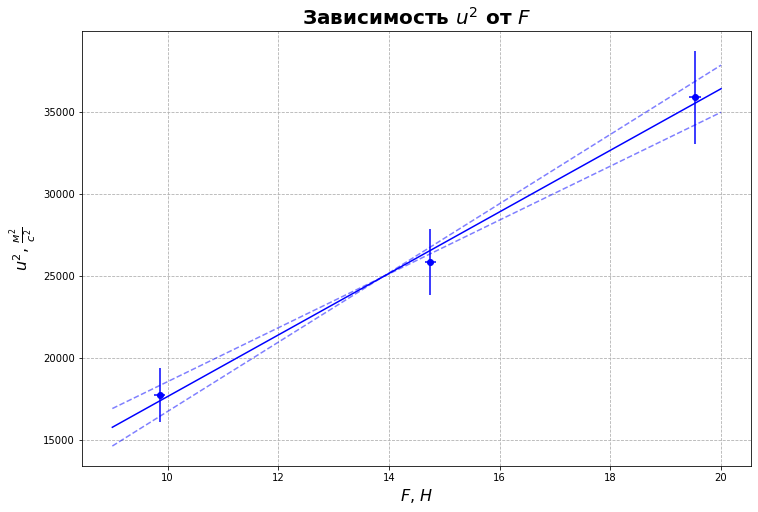

In [31]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='--')

grid2 = np.linspace(9, 20, 100)

plt.title('Зависимость $u^2$ от $F$', fontweight='bold', fontsize=20)
plt.ylabel('$u^2$, $\\frac{м^2}{с^2}$', fontsize=16)
plt.xlabel('$F$, $Н$', fontsize=16)

plt.plot(grid2, k * grid2 + b, color='b')
plt.errorbar(F, u * u, xerr=dF*20, yerr=du2, fmt='o', color='b')

plt.plot(grid2, kmax * grid2 + bmax, '--', color='b', alpha=0.5)
plt.plot(grid2, kmin * grid2 + bmin, '--', color='b', alpha=0.5)

plt.show()

In [32]:
dk = (kmax - kmin) / 2
print(dk)

234.69072340974503


In [35]:
rho = 1.0 / k * 1e6
drho = rho * (dk / k)
print(rho, drho)

532.4095101262401 66.52540581396039


Таким образом, по измерениям получили $\rho_l = (532.4 \pm 66.5)$ мг, в то время как истинное значение составляет $568.4$ мг. Оно укладывается в заданный диапазон.